MNIST is one of the most known example of database on which CNN do a very good job (the first useful success thanks to <a href="http://yann.lecun.com/exdb/lenet/">LeNet</a> of Yann LeCun).
Here is a nice <a href="https://www.kaggle.com/yassineghouzam/introduction-to-cnn-keras-0-997-top-6">introduction to Keras to solve MNIST</a> with a accuracy of 99.7%.

However MNIST is not such a good example for CNN since we can do it without convolution layers. In some way it is too simple, a simple dense network gives also very good results, 98.2% accuracy without data augmenatation.

Note that the last activation function is a `sigmoid` and not a `softmax` as it is usualy.

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pylab as plt
import tensorflow as tf

np.set_printoptions(precision=4, suppress=True, floatmode='fixed')

SEED = 123                 # to be able to rerun the same NN
np.random.seed(SEED)
#tf.set_random_seed(SEED)

%matplotlib inline

2024-12-10 22:08:42.536961: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-12-10 22:08:42.539518: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-12-10 22:08:42.546446: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1733864922.557417   42590 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1733864922.560611   42590 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-12-10 22:08:42.573059: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU ins

In [2]:
data = np.load("mnist.npz")

x_train = data['x_train']
y_train = data['y_train']
x_test = data['x_test']
y_test = data['y_test']

x_train, x_test = x_train / 255.0, x_test / 255.0

In [3]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten

model = Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='sigmoid'))

/home/lilian/Documents/SCIA/S9/MLOps/SciKitPlusPlus/notebooks/venv/lib/python3.12/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
2024-12-10 22:08:49.131137: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


In [4]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │       401,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 407,050 (1.55 MB)

 Trainable params: 407,050 (1.55 MB)

 Non-trainable params: 0 (0.00 B)

In [5]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy']
              )

model.fit(x_train, y_train, epochs=10, validation_split=0.1)

Epoch 1/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8859 - loss: 0.3888 - val_accuracy: 0.9725 - val_loss: 0.0952
Epoch 2/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9675 - loss: 0.1073 - val_accuracy: 0.9737 - val_loss: 0.0879
Epoch 3/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9781 - loss: 0.0699 - val_accuracy: 0.9772 - val_loss: 0.0782
Epoch 4/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9838 - loss: 0.0528 - val_accuracy: 0.9792 - val_loss: 0.0746
Epoch 5/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9874 - loss: 0.0402 - val_accuracy: 0.9797 - val_loss: 0.0740
Epoch 6/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9885 - loss: 0.0343 - val_accuracy: 0.9820 - val_loss: 0.0655
Epoch 7/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9901 - loss: 0.0310 - val_accuracy: 0.9835 - val_loss: 0.0590
Epoch 8/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9917 - loss: 0.0262 - 

In [6]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])

Test score: 0.07456574589014053
Test accuracy: 0.980400025844574


Let's find cases where model is the most confident but wrong.

In [7]:
import time

In [8]:
start = time.time()
res = model.predict(x_train, batch_size=x_train.shape[0])
end = time.time()
print(f"elapsed time: {end - start}s")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step
elapsed time: 0.46764636039733887s


In [8]:
bad = res[y_test != res.guess].sort_values('trust', ascending=False)
bad.head(10)

,true,guess,trust
2387,9,1,0.825029
2654,6,1,0.799398
2433,2,1,0.779924
3780,4,6,0.550417
1621,0,6,0.446433
2135,6,1,0.422373
2597,5,3,0.390841
1112,4,6,0.359532
9729,5,6,0.331563
4027,7,1,0.312888


Image 2387
Model says it is a 1 while it is a 9
Stats are [[0.0000 0.8250 0.0000 0.0000 0.0000 0.0000 0.0000 0.0005 0.0000 0.0049]]


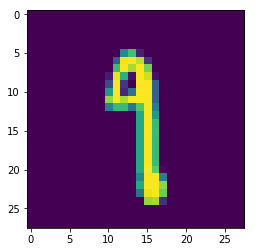

In [9]:
i = bad.index.values[0]
res = model.predict(x_test[i][None,:,:])  # None allows to add a dimension, Error messages told me to do that :-)
print("Image", i)
print(f"Model says it is a {np.argmax(res)} while it is a {y_test[i]}")
print("Stats are", np.array(res))
plt.imshow(x_test[i])

In [19]:
first_weights, first_bias = model.layers[1].get_weights()
second_weights, second_bias = model.layers[3].get_weights()

In [21]:
second_bias.shape

(10,)

In [22]:
from utils import serialize_matrix

In [23]:
serialize_matrix(first_weights, "w1.dat")
serialize_matrix(second_weights, "w2.dat")
serialize_matrix(first_bias, "b1.dat")
serialize_matrix(second_bias, "b2.dat")